In [2]:
#Importing the dependencies
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pylab import rcParams

#Changes default matplotlib plots to this size
rcParams['figure.figsize'] = 14, 8 

In [3]:
# Load the dataset and convert the timestamp to datetime object

raw_data = pd.read_csv('./actuals.csv')
timestamp = []

for row in tqdm(raw_data.timestamp.tolist()):

    tstamp = datetime.strptime(row,'%d/%b/%Y %H:%M')
    timestamp.append(tstamp)
    
raw_data['timestamp'] = timestamp

raw_data.set_index('timestamp',inplace=True)
raw_data.index = pd.to_datetime(raw_data.index, format='%Y-%m-%d %H:%M:%S')

raw_data.columns = ['load', 't1', 't2', 't3']

raw_data

,load,t1,t2,t3
timestamp,,,,
2014-07-24 12:30:00,499.247996,21.5,21.545455,19.000
2014-07-24 12:45:00,530.257188,21.0,21.818182,19.000
2014-07-24 13:00:00,477.541561,21.5,21.800000,19.000
2014-07-24 13:15:00,463.587425,22.0,21.854545,19.000
2014-07-24 13:30:00,395.367202,22.0,21.909091,19.000
...,...,...,...,...
2016-05-26 19:15:00,1821.790047,24.0,24.727273,22.000
2016-05-26 19:30:00,1581.468807,24.0,24.454545,22.000
2016-05-26 19:45:00,784.532565,24.0,24.181818,22.000


In [5]:
# Resampling the data at an interval of 1 hour

df = raw_data.resample(rule='h').mean()
df = df.asfreq('h')
# df = raw_data
df = df.interpolate(method='linear')

In [6]:
# Adding temporal features to the dataset

df['dow'] = df.index.dayofweek
df['doy'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
# df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
# df['weekday'] = df.index.day_name()

df['woy'] = df.index.weekofyear
df['dom'] = df.index.day
df['date'] = df.index.date 

In [7]:
df

,load,t1,t2,t3,dow,doy,year,month,hour,woy,dom,date
timestamp,,,,,,,,,,,,
2014-07-24 12:00:00,514.752592,21.250,21.681818,19.000000,3,205,2014,7,12,30,24,2014-07-24
2014-07-24 13:00:00,432.578233,21.875,21.881818,19.000000,3,205,2014,7,13,30,24,2014-07-24
2014-07-24 14:00:00,425.988779,21.575,22.000000,19.750000,3,205,2014,7,14,30,24,2014-07-24
2014-07-24 15:00:00,485.293859,22.000,22.000000,20.791666,3,205,2014,7,15,30,24,2014-07-24
2014-07-24 16:00:00,470.564493,22.000,21.881818,21.291666,3,205,2014,7,16,30,24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-26 16:00:00,2073.352119,25.875,26.527273,22.791666,3,147,2016,5,16,21,26,2016-05-26
2016-05-26 17:00:00,2476.859234,25.575,26.881818,22.822916,3,147,2016,5,17,21,26,2016-05-26
2016-05-26 18:00:00,2133.820044,25.000,26.181818,22.104166,3,147,2016,5,18,21,26,2016-05-26


In [5]:
# converting the temporal features into cyclic in nature

df['hr_sin'] = np.round(np.sin(df.hour*(2.*np.pi/24)), 15)
df['hr_cos'] = np.round(np.cos(df.hour*(2.*np.pi/24)), 15)

df['mnth_sin'] = np.round(np.sin((df.month-1)*(2.*np.pi/12)), 15)
df['mnth_cos'] = np.round(np.cos((df.month-1)*(2.*np.pi/12)), 15)

df['dow_sin'] = np.round(np.sin((df.dow)*(2.*np.pi/12)), 15)
df['dow_cos'] = np.round(np.cos((df.dow)*(2.*np.pi/12)), 15)

df['woy_sin'] = np.round(np.sin((df.woy-1)*(2.*np.pi/12)), 15)
df['woy_cos'] = np.round(np.cos((df.woy-1)*(2.*np.pi/12)), 15)

df['dom_sin'] = np.round(np.sin((df.dom-1)*(2.*np.pi/12)), 15)
df['dom_cos'] = np.round(np.cos((df.dom-1)*(2.*np.pi/12)), 15)

df['doy_sin'] = np.round(np.sin((df.doy-1)*(2.*np.pi/12)), 15)
df['doy_cos'] = np.round(np.cos((df.doy-1)*(2.*np.pi/12)), 15)

In [6]:
# Adding the categorical variable to represent working days to the dataset
is_working = [1]*len(df)
weekend = ['Saturday', 'Sunday']

for i, date in tqdm(enumerate(df.index.tolist())):
    day, month, day_name = date.day, date.month, date.day_name()
    holidays = [
        (day==1  and month==1),
        (day==6  and month==1),
        (day==21 and month==4),
        (day==25 and month==4),
        (day==1  and month==5),
        (day==2  and month==6),
        (day==15 and month==8),
        (day==1  and month==11),
        (day==8  and month==12),
        (day==25 and month==12),
        (day==26 and month==12),
        (day_name in weekend)
    ]
#     print(holidays)
    if any(holidays):
        is_working[i] = 0
        
df['working'] = is_working

In [7]:
dataNormal = pd.Series(df['load'].apply(np.log))
dataDefault = pd.Series(df['load'])

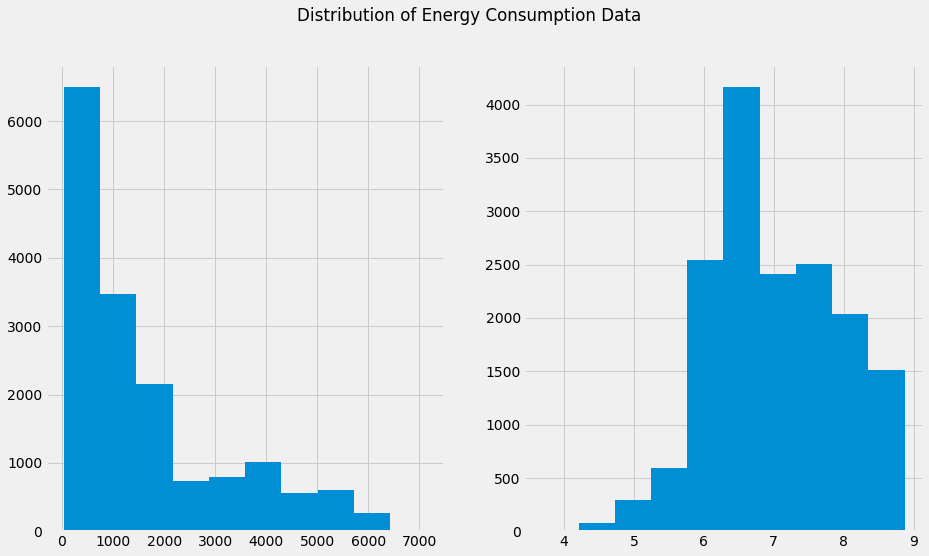

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Distribution of Energy Consumption Data')
dataDefault.hist(ax=ax1)
dataNormal.hist(ax=ax2)

In [9]:
# Normalizing the temperature data
df.t1 = (df.t1 - 13.81)/(8.007)
df.t2 = (df.t2 - 13.69)/(8.184)
df.t3 = (df.t3 - 13.89)/(7.705)

# Applying logarithmic function to make the feature into normal distribution
df['load'] = df['load'].apply(np.log)

In [10]:
# df.drop(['month', 'hour', 'weekday', 'quarter', 'dom', 'dow', 'date', 'doy', 'woy'], axis=1, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [1]:
df.head()

NameError: name 'df' is not defined

In [15]:
df.load = ( df.load - df.load.min(axis=0) ) / (df.load.max(axis=0) - df.load.min(axis=0))
df

,load,t1,t2,t3,dow,doy,year,month,hour,woy,...,mnth_cos,dow_sin,dow_cos,woy_sin,woy_cos,dom_sin,dom_cos,doy_sin,doy_cos,working
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-07-24 12:00:00,0.493039,0.929187,0.976517,0.663206,3,205,2014,7,12,30,...,-1.0,1.0,0.0,0.500000,-0.866025,-0.5,0.866025,-1.100000e-14,1.0,1
2014-07-24 13:00:00,0.459499,1.007244,1.000955,0.663206,3,205,2014,7,13,30,...,-1.0,1.0,0.0,0.500000,-0.866025,-0.5,0.866025,-1.100000e-14,1.0,1
2014-07-24 14:00:00,0.456539,0.969776,1.015396,0.760545,3,205,2014,7,14,30,...,-1.0,1.0,0.0,0.500000,-0.866025,-0.5,0.866025,-1.100000e-14,1.0,1
2014-07-24 15:00:00,0.481675,1.022855,1.015396,0.895739,3,205,2014,7,15,30,...,-1.0,1.0,0.0,0.500000,-0.866025,-0.5,0.866025,-1.100000e-14,1.0,1
2014-07-24 16:00:00,0.475731,1.022855,1.000955,0.960632,3,205,2014,7,16,30,...,-1.0,1.0,0.0,0.500000,-0.866025,-0.5,0.866025,-1.100000e-14,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-26 16:00:00,0.761713,1.506807,1.568582,1.155310,3,147,2016,5,16,21,...,-0.5,1.0,0.0,-0.866025,-0.500000,0.5,0.866025,8.660254e-01,0.5,1
2016-05-26 17:00:00,0.796005,1.469339,1.611903,1.159366,3,147,2016,5,17,21,...,-0.5,1.0,0.0,-0.866025,-0.500000,0.5,0.866025,8.660254e-01,0.5,1
2016-05-26 18:00:00,0.767257,1.397527,1.526371,1.066083,3,147,2016,5,18,21,...,-0.5,1.0,0.0,-0.866025,-0.500000,0.5,0.866025,8.660254e-01,0.5,1


In [17]:
df.load.describe()

count    16137.000000
mean         0.641803
std          0.174664
min          0.000000
25%          0.514327
50%          0.614648
75%          0.769382
max          1.000000
Name: load, dtype: float64

In [12]:

df.reset_index(drop=True, inplace=True)

# Uncomment the next line to save the dataset to the working directory
df.to_csv('./data.csv', index=False)
# df

In [16]:
df['load'].std(), df['load'].mean()

(0.9176145163751367, 7.003700486209447)

In [11]:
df['load'].std(), df['load'].mean()

(0.9057370007160583, 7.0151186066775795)

In [12]:
( df.load - df.load.min(axis=0) ) / (df.load.max(axis=0) - df.load.min(axis=0))

timestamp
2014-07-24 12:00:00    0.493039
2014-07-24 13:00:00    0.459499
2014-07-24 14:00:00    0.456539
2014-07-24 15:00:00    0.481675
2014-07-24 16:00:00    0.475731
                         ...   
2016-05-26 16:00:00    0.761713
2016-05-26 17:00:00    0.796005
2016-05-26 18:00:00    0.767257
2016-05-26 19:00:00    0.699000
2016-05-26 20:00:00    0.526057
Freq: H, Name: load, Length: 16137, dtype: float64

In [13]:
( df.load - df.load.min(axis=0) ) / (df.load.max(axis=0) - df.load.min(axis=0))

timestamp
2014-07-24 12:00:00    0.493039
2014-07-24 13:00:00    0.459499
2014-07-24 14:00:00    0.456539
2014-07-24 15:00:00    0.481675
2014-07-24 16:00:00    0.475731
                         ...   
2016-05-26 16:00:00    0.761713
2016-05-26 17:00:00    0.796005
2016-05-26 18:00:00    0.767257
2016-05-26 19:00:00    0.699000
2016-05-26 20:00:00    0.526057
Freq: H, Name: load, Length: 16137, dtype: float64

In [20]:
# (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [14]:
for i,row in df.items():
    print (row)

timestamp
2014-07-24 12:00:00    6.243686
2014-07-24 13:00:00    6.069763
2014-07-24 14:00:00    6.054413
2014-07-24 15:00:00    6.184755
2014-07-24 16:00:00    6.153933
                         ...   
2016-05-26 16:00:00    7.636922
2016-05-26 17:00:00    7.814747
2016-05-26 18:00:00    7.665669
2016-05-26 19:00:00    7.311715
2016-05-26 20:00:00    6.414902
Freq: H, Name: load, Length: 16137, dtype: float64
timestamp
2014-07-24 12:00:00    0.929187
2014-07-24 13:00:00    1.007244
2014-07-24 14:00:00    0.969776
2014-07-24 15:00:00    1.022855
2014-07-24 16:00:00    1.022855
                         ...   
2016-05-26 16:00:00    1.506807
2016-05-26 17:00:00    1.469339
2016-05-26 18:00:00    1.397527
2016-05-26 19:00:00    1.288248
2016-05-26 20:00:00    1.135257
Freq: H, Name: t1, Length: 16137, dtype: float64
timestamp
2014-07-24 12:00:00    0.976517
2014-07-24 13:00:00    1.000955
2014-07-24 14:00:00    1.015396
2014-07-24 15:00:00    1.015396
2014-07-24 16:00:00    1.000955
      